# Scratch Implementation of PCA in Python #

In this notebook, I will be implementing Principal Component Analysis(PCA) in python. PCA is a dimensionality reduction technique which can be used to reduce the dimensionality of large, multi-dimensional datasets. It does this by taking each datapoint and projecting them upon the principal components.

PCA is an unsupervised in nature, meaning we only consider the datapoints without considering any labels.

The dataset we will be using will be the well-known iris dataset for the sake of simplicity and easy verifcation.

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris.data)
df.columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
matrix = np.array(df.values)

In [6]:
mean_vector = []

for column in df.columns:
    values = df[str(column)].values
    mean_vector.append(np.mean(values))

### Standardization Funtions ###

In [7]:
def Standard_Deviation(samples):
    samples_arr = samples.reshape(-1)
    mean = np.mean(samples_arr)
    n = len(samples_arr)
    
    samples_arr = [(sample - mean)**2 for sample in samples_arr]
    summation = np.sum(samples_arr)
    std = np.sqrt(summation/n)
    
    return std

def Standardize_Feature(feature_samples):
    mean = np.mean(feature_samples)
    std = Standard_Deviation(feature_samples)
    
    standardized_data = [ (sample - mean) / std for sample in feature_samples]
    return standardized_data

def Standardize_Matrix(matrix):
    rows, columns = matrix.shape
    standardized_matrix = np.zeros((rows, columns))
    
    for column in range(0, columns):
        feature_samples = matrix[:, column]
        standardized_matrix[:, column] = Standardize_Feature(feature_samples)
        
    return standardized_matrix

### Covariance Funtions ###

In [8]:
def cov(feature_samples1, feature_samples2, feature_mean1=None, feature_mean2=None):
    n = len(feature_samples1)
    
    if(feature_mean1==None):
        feature_mean1 = np.mean(feature_samples1)
    if(feature_mean2==None):
        feature_mean2 = np.mean(feature_samples2)
    
    standardized_feature_samples1 = [ sample - feature_mean1 for sample in feature_samples1 ]
    standardized_feature_samples2 = [ sample - feature_mean2 for sample in feature_samples2 ]
    
    summation_products = 0
    for s1, s2 in zip(standardized_feature_samples1, standardized_feature_samples2):
        summation_products += s1*s2
        
    return summation_products/n

def Covariance_Matrix(MatrixArr):
    rows, columns = MatrixArr.shape
    covariance_matrix = np.zeros((columns, columns))
    
    for i in range(0, columns):
        feature_samples1 = MatrixArr[:,i]
        for j in range(0, columns):
            feature_samples2 = MatrixArr[:,j]
            
            covariance_matrix[i,j] = cov(feature_samples1, feature_samples2)
            
    return covariance_matrix

1] Standardization of our Data

In [9]:
standardized = Standardize_Matrix(matrix)

2] Getting Covariance Matrix 

In [10]:
covMatrix = Covariance_Matrix(standardized)

3] Computing Eigenvectors, Eigenalues of our Covariance Matrix

In [11]:
eigen_values, eigen_vectors = np.linalg.eig(covMatrix)

In [12]:
eigen_values

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [13]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [14]:
#Choosing the top 2 eigenvectors:
selected_eigen_vectors = eigen_vectors[:,:2]
print(selected_eigen_vectors)

[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [20]:
reduced_data = np.dot(matrix, selected_eigen_vectors)
reducedDf = pd.DataFrame(reduced_data, columns=['dim1', 'dim2'])

reducedDf['species'] = iris.target
reducedDf.reset_index()
color_dict = dict({0:'blue', 1:'organge', 2:'red'})

In [21]:
reducedDf

,dim1,dim2,species
0,2.640270,-5.204041,0
1,2.670730,-4.666910,0
2,2.454606,-4.773636,0
3,2.545517,-4.648463,0
4,2.561228,-5.258629,0
...,...,...,...
145,7.000417,-5.579908,2
146,6.584640,-4.935618,2
147,6.726747,-5.484342,2
148,6.748228,-5.765416,2


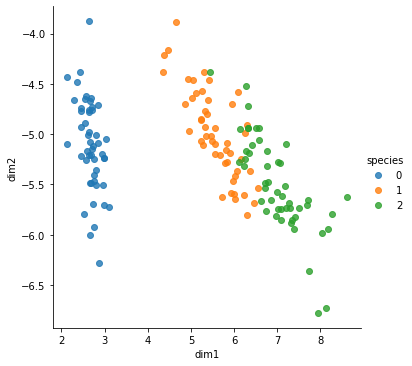

In [27]:
sns.lmplot(data=reducedDf, x='dim1', y='dim2', hue='species', fit_reg=False)